In [1]:
import torch

In [2]:
lstm = torch.nn.LSTM(input_size=1,hidden_size=4,num_layers=1)
for name, param in lstm.named_parameters():
    print(name, param.shape)

weight_ih_l0 torch.Size([16, 1])
weight_hh_l0 torch.Size([16, 4])
bias_ih_l0 torch.Size([16])
bias_hh_l0 torch.Size([16])


## Questions

weight_ih: input weights

weight_hh: hidden weights

dimensions: input, forget, cell, output weights stacked

version of LSTM: Wikipedia version (no peephole connection)

initialization? using fan_out, initialize each one of four matrices separately (3 if GRU)


# Shakespeare Language Model

In [5]:
# import torch
# import torch.nn as nn
# import torch.nn.utils.rnn as rnn
# from torch.utils.data import Dataset, DataLoader, TensorDataset
# import numpy as np
# import time
# # import shakespeare_data as sh

# device = "cuda" if torch.cuda.is_available() else "cpu"
# device

'cpu'

# Fixed length input

In [ ]:
# # data - refere to shakespeare_data.py for details
# corpus = sh.read_corpus()
# chars, charmap = sh.get_charmap(corpus)
# charcount = len(chars)
# shakespeare_array = sh.map_corpus(corpus, charmap)
# small_example = shakespeare_array[:17]

In [ ]:
# # dataset class
# # transforms raw text into a set of sequences of fixed length
# # extracts inputs and targets
# class TextDataset(Dataset):
    
#     def __init__(self, text, seq_len=200):
#         n_seq = len(text) // seq_len
#         text = text[:n_seq * seq_len]
#         self.data = torch.tensor(text).view(-1, seq_len)
        
#     def __getitem__(self,i):
#         txt = self.data[i]
        
#         # labels are the input sequence shifted by 1
#         return txt[:-1],txt[1:]
    
#     def __len__(self):
#         return self.data.size(0)
    
#     def collate(seq_list):
#         inputs = torch.cat([s[0].unsqueeze(1) for s in seq_list], dim=1)
#         targets = torch.cat([s[1].unsqueeze(1) for s in seq_list],dim=1)
#         return inputs,targets

In [21]:
# # model
# class CharLanguageModel(nn.Module):
#     def __init__(self,vocab_size,embed_size,hidden_size,nlayers):
#         super(CharLanguageModel,self).__init__()
#         self.vocab_size = vocab_size
#         self.embed_size = embed_size
#         self.hidden_size = hidden_size
#         self.nlayers = nlayers
#         self.embedding = nn.Embedding(vocab_size, embed_size)
#         self.rnn = nn.LSTM(input_size = embed_size, hidden_size = hidden_size,num_layers=nlayers)
        
#         self.scoring = nn.Linear(hidden_size,vocab_size) # projection layer
        
#     def forward(self, seq_batch): # L x N
#         batch_size = seq_batch.size(1)
#         embed = self.embedding(seq_batch)  # L x N x E
#         hidden = None
#         output_lstm, hidden = self.rnn(embed, hidden) # L x N x H
#         output_lstm_flatten = output_lstm.view(-1,self.hidden_size) # (L * N) x H
#         output_flatten = self.scoring(output_lstm_flatten) # (L * N ) x V
#         return output_flatten.view(-1,batch_size,self.vocab_size)
    
#     # greedy search to extract and return words (one sequence)
#     def generate(self, seq, n_words): # L x V
#         generated_words = []
#         embed = self.embedding(seq).unsqueeze(1) # L x 1 # E
#         hidden = None
#         output_lstm, hidden = self.rnn(embed,hidden) # L x 1 x H
#         output = output_lstm[-1] # 1 x H
#         scores = self.scoring(output) # 1 x V
#         _,current_word = torch.max(scores,dim=1) # 1 x 1
#         generated_words.append(current_word)
        
#         if n_words > 1:
#             for i in range(n_words-1):
#                 embed = self.embedding(current_word).unsqueeze(0) # 1 x 1 x E
#                 output_lstm, hidden = self.rnn(embed, hidden) # 1 x 1 x H
#                 output = output_lstm[0] # 1 x H
#                 scores= self.scoring(output) # V
#                 _,current_word = torch.max(scores,dim=1) # 1 x 1
#                 generated_words.append(current_word)
#         return torch.cat(generated_words,dim=0)
        

In [22]:
# def train_epoch(model, optimizer, train_loader, val_loader):
#     criterion = nn.CrossEntropyLoss()
#     criterion = criterion.to(device)
#     before = time.time()
    
#     for batch_idx, (inputs,targets) in enumerate(train_loader):
#         inputs = inputs.to(device)
#         targets = targets.to(device)
#         outputs = model(inputs)
#         loss = criterion(outputs.view(-1,outputs.size(2)),targets.view(-1))
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
        
#         val_loss = 0
#         batch_id = 0
#         for inputs,targets in val_loader:
#             batch_id+=1
#             inputs = inputs.to(device)
#             targets = targets.to(device)
#             outputs= model(inputs)
#             loss = criterion(outputs.view(-1,outputs.size(2)),targets.view(-1))
#             val_loss += loss.item()
#         val_lpw = val_loss / batch_id
        
            

In [23]:
# model = CharLanguageModel(charcount, 256,256,3)
# model = model.to(device)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-6)
# split = 5000000
# train_dataset = TextDataset(shakespeare_array[:split])
# val_dataset = TextDataset(shakespeare_array[split:])
# train_loader = DataLoader(train_dataset, shuffle=True, batch_size=64, collate_fn=collate)
# val_loader = DataLoader(train_dataset, shuffle=False, batch_size=64, collate_fn=collate,drop_last=True)


NameError: name 'charcount' is not defined

In [24]:
# for i in range(3):
#     train_epoch(model, optimizer, train_loader, val_loader)

NameError: name 'model' is not defined

In [26]:
# def generate(model, seed, nwords):
#     seq = sh.map_corpus(seed, charmap)
#     seq = torch.tensor(seq).to(device)
#     out = model.generate(seq,nwords)
#     return sh.to_text(out.cpu().detach().numpy(), chars)

In [35]:
a = [torch.tensor([1,2,3,5]), torch.tensor([3,4])]
print(a)
b = torch.nn.utils.rnn.pad_sequence(a, batch_first=True)
print(b)

[tensor([1, 2, 3, 5]), tensor([3, 4])]
tensor([[1, 2, 3, 5],
        [3, 4, 0, 0]])


In [37]:
torch.nn.utils.rnn.pack_padded_sequence(b, batch_first=True, lengths=[4,2])

PackedSequence(data=tensor([1, 3, 2, 4, 3, 5]), batch_sizes=tensor([2, 2, 1, 1]), sorted_indices=None, unsorted_indices=None)

In [39]:
a = [torch.tensor([1,2,3,5]), torch.tensor([3,4])]
print(a)
b = torch.nn.utils.rnn.pad_sequence(a, batch_first=True)
print(b)

[tensor([1, 2, 3, 5]), tensor([3, 4])]
tensor([[1, 2, 3, 5],
        [3, 4, 0, 0]])


In [40]:
b = torch.nn.utils.rnn.pack_sequence(a)
b

PackedSequence(data=tensor([1, 3, 2, 4, 3, 5]), batch_sizes=tensor([2, 2, 1, 1]), sorted_indices=None, unsorted_indices=None)

In [19]:
import os
import numpy as np

path='/Users/ryanqnelson/Desktop/test/content/competitions/11785-fall2021-hw3p2/HW3P2_Data'

# add phoneme_list.py to path
import sys
sys.path.insert(1, path)

import phoneme_list as pl
import matplotlib.pyplot as plt

In [3]:
pl.N_PHONEMES

41

In [5]:
len(pl.PHONEME_LIST)

42

In [6]:
len(pl.PHONEME_MAP)

42

In [14]:
val_labels = np.load(os.path.join(path,'dev_labels.npy'),allow_pickle=True)
len(val_labels)

2200

In [13]:
val_data = np.load(os.path.join(path,'dev.npy'),allow_pickle=True)
len(val_data)

2200

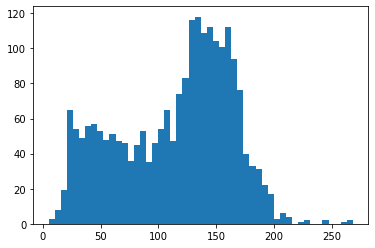

In [21]:
lengths = []
for each in val_labels:
    lengths.append(len(each))
    
plt.hist(lengths,50)
plt.show()

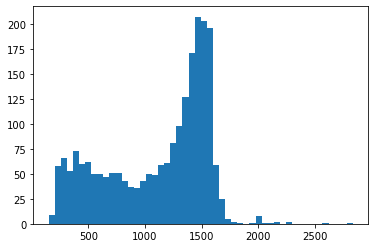

In [24]:

lengths = []
for each in val_data:
    lengths.append(each.shape[0])
    
plt.hist(lengths,50)
plt.show()